In [45]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import re

In [28]:
img_array = np.array(Image.open('sprites/shrub.png'))

In [37]:
COLORS = {1:[0, 0, 0, 255], 2:[85, 85, 85, 255], 3:[170, 170, 170, 255], 4:[255, 255, 255, 255]}

In [41]:
def to_palette(file_path):
    img_array = np.array(Image.open(file_path))
    result = np.zeros(img_array.shape[:2])
    for key in COLORS:
        result += np.all(img_array == COLORS[key], axis=2) * key

    return result.astype(int)

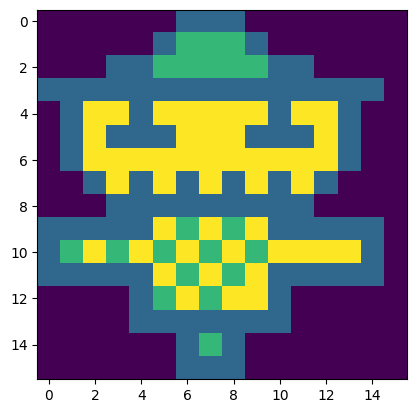

In [42]:
plt.imshow(to_palette("sprites/scarecrow.png"))
plt.show()

In [60]:
def get_javascript(file_path):
    matches = re.findall("([^/]+?).png", file_path)
    if matches:
        name = matches[0]
    else:
        name = "bitmap"
    arr = to_palette(file_path)
    result = "const " + name + " ["

    for row in arr:
        result += "["
        for color in row:
            result += str(color) + ", "
        result = result[:-2]
        result += "], "
    result = result[:-2]
    result += "];"

    return result

get_javascript("sprites/scarecrow.png")

'const scarecrow [[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [0, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 0, 0], [0, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 0, 0], [0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 0], [0, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 0, 0], [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 1, 1, 1, 3, 2, 3, 2, 3, 1, 1, 1, 1, 1, 0], [1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 1, 0], [1, 1, 1, 1, 1, 3, 2, 3, 2, 3, 1, 1, 1, 1, 1, 0], [0, 0, 0, 0, 1, 2, 3, 2, 3, 3, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]];'